In [26]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_excel

In [2]:
data = read_excel('./Downloads/datosFH.xlsx')
data = data.as_matrix()

vecs = [] #0:voltage 1; 1: current 1 ; 2: voltage 2 ...
for i in range(6):
    vecs.append(data[:,i][4:36])

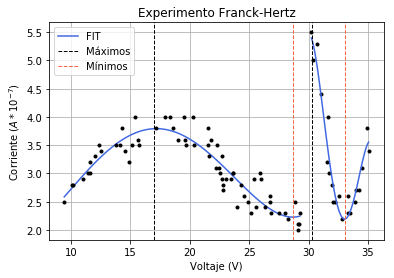

In [5]:
#Concatenate vectors
V = [i for i in np.concatenate((vecs[0],vecs[2],vecs[4]))] 
I = [i for i in np.concatenate((vecs[1],vecs[3],vecs[5]))]

#General sorted list
I = [i for _,i in sorted(zip(V,I))] #Sort I with same order as values of sorted V
V = sorted(V)

limC = 87   #only take the first limC points
V = V[:limC]
I = I[:limC]

#Values for first fit 
lim = 66
I_ = I[:lim]
V_ = V[:lim]

#first fit
degree = 4
coefs = np.polyfit(V_,I_,degree)
p = np.poly1d(coefs)
x=np.linspace(np.amin(V_),np.amax(V_),100)

#------------------------------------------------PLOT
fig = plt.figure()
ax = plt.subplot()
linecol = 'royalblue' #color of the fit func.
ax.plot(x,p(x),color = linecol)

#Find the points where the slope = 0 (maxima in this range)
epsilon = 1e-2
maxi = 0
for i in np.arange(15,17,1e-3):
    if (p(i+1e-4)-p(i))/1e-4 < epsilon:
        maxi = i
        
ax.plot(V,I,'k.')
#---------------------------
#Values for second fit 
I_1 = I[lim:]
V_1 = V[lim:]

second_max = np.mean(V_1[:2])

#second fit
degree = 4
coefs = np.polyfit(V_1,I_1,degree)
p1 = np.poly1d(coefs)

x=np.linspace(np.amin(V_1),np.amax(V_1),100)
ax.plot(x,p1(x),color = linecol,label = 'FIT')


#CLACULO DE MINIMOS: ----------------------------------------#

#Calcula mínimo en primer fit
epsilon = 1e-6
min0 = 0
for i in np.arange(27,30,1e-2):
    if (p(i+1e-4)-p(i))/1e-4 < epsilon:
        min0 = i
    
#Calcula mínimo en segundo fit
epsilon = 1e-6
mini = 0
for i in np.arange(32,35,1e-2):
    if (p1(i+1e-4)-p1(i))/1e-4 < epsilon:
        mini = i
        
delta_min = mini-min0
delta_max = second_max - maxi

#plot maxima
ax.axvline(x=maxi,linestyle='--',color='k',linewidth=1)
ax.axvline(x=second_max,linestyle='--',color='k',linewidth=1,label = 'Máximos')

#plot minima
ax.axvline(x=min0,linestyle='--',color='tomato',linewidth=1)
ax.axvline(x=mini,linestyle='--',color='tomato',linewidth=1,label = 'Mínimos')


ax.set_ylabel(r'Corriente $(A*10^{-7})$')
ax.set_xlabel('Voltaje (V)')
ax.set_title('Experimento Franck-Hertz')

plt.grid()
plt.legend()
plt.savefig('franckHertz.png',dpi=200)
plt.show()

In [6]:
delta_max,delta_min

(13.291000000001105, 4.369999999999532)

In [24]:
suma = 0
for i in range(len(V_1)):
    suma += (I_1[i]-p(V_1[i]))**2

In [25]:
np.sqrt(suma/(len(V_)-1))

0.9084446182839844

In [27]:
min0

28.67000000000026

In [28]:
mini

33.03999999999979